In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.backends.backend_pdf as pdf
from statsmodels.tsa.x13 import x13_arima_analysis
plt.style.use("seaborn-pastel")

C:\Users\Usuario\AppData\Local\Temp\ipykernel_18060\3229212654.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-pastel")


# Cargamos Datos

In [2]:
file="C:/Users/usuario/OneDrive/Escritorio/3ro GANE/Informe"

In [3]:
ta=pd.read_excel("ta.xlsx")
te=pd.read_excel("te.xlsx")
tp=pd.read_excel("tp.xlsx")
afil=pd.read_csv("afil.csv", sep=";", skiprows=1, encoding="ISO-8859-1")
par=pd.read_excel("par.xlsx")
tt=pd.read_excel("tt.xlsx")
soc=pd.read_excel("soc.xlsx")
emp=pd.read_excel("emp.xlsx")

C:\Anaconda\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [4]:
#Seleccionamos filas con datos
ta=ta.loc[8:94]
te=te.loc[8:94]
tp=tp.loc[8:94]
tt=tt.loc[8:94]

In [5]:
#Cambiamos nombres columnas y ponemos indice
list=[ta,te,tp,tt]
for var in list:
    var.columns=["fecha", "hom_esp", "hom_ara", "muj_esp", "muj_ara", "esp", "ara"]
    var["fecha"]=var["fecha"].str[:4]+"Q"+var["fecha"].str[-1:]
    var["fecha"]=pd.to_datetime(var["fecha"])
    var.sort_values("fecha", inplace=True)
    var.set_index("fecha", inplace=True)
    
#Desestacionalizamos para España: 
for var in list:
    XPATH=r"C:\WinX13\x13as\x13as"
    deses = x13_arima_analysis(endog=var["esp"], x12path=XPATH, trading=True).seasadj
    var["esp_des"]=deses
    
#Desestacionalizamos para Aragón: 
for var in list:
    XPATH=r"C:\WinX13\x13as\x13as"
    deses = x13_arima_analysis(endog=var["ara"], x12path=XPATH, trading=True).seasadj
    var["ara_des"]=deses

C:\Users\Usuario\AppData\Local\Temp\ipykernel_18060\972613666.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  var["fecha"]=pd.to_datetime(var["fecha"])
C:\Users\Usuario\AppData\Local\Temp\ipykernel_18060\972613666.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  var["fecha"]=pd.to_datetime(var["fecha"])
C:\Users\Usuario\AppData\Local\Temp\ipykernel_18060\972613666.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  var["fecha"]=pd.to_datetime(var["fecha"])
C:\Users\Usuario\AppData\Local\Temp\ipykernel_18060\972613666.py:6: UserWarning: Could not infer format, so each

In [6]:
#Tasa temporalidad:
tt=tt*100

deses = x13_arima_analysis(endog=tt["esp"], x12path=XPATH, trading=True).seasadj
tt["esp_des"]=deses

deses = x13_arima_analysis(endog=tt["ara"], x12path=XPATH, trading=True).seasadj
tt["ara_des"]=deses

#Afiliados:
afil.columns=["fecha", "esp", "ara"]
afil['fecha'] = pd.to_datetime(afil['fecha'], format='%Y%m')
afil.set_index("fecha", inplace=True)


#Desestacionalizamos:
deses = x13_arima_analysis(endog=afil["esp"], x12path=XPATH, trading=True).seasadj
afil["esp_des"]=deses

deses = x13_arima_analysis(endog=afil["ara"], x12path=XPATH, trading=True).seasadj
afil["ara_des"]=deses

#Calculamos tasas
afil["esp_tv"]= afil['esp_des'].pct_change(12)*100
afil["ara_tv"]=afil["ara_des"].pct_change(12)*100

#Parados:
par=par.loc[8:94]
par.columns=["fecha", "esp", "ara"]
par["fecha"]=par["fecha"].str[:4]+"Q"+par["fecha"].str[-1:]
par["fecha"]=pd.to_datetime(par["fecha"])
par.set_index("fecha", inplace=True)
par.sort_index(inplace=True)

#Desestacionalizamos
deses = x13_arima_analysis(endog=par["esp"], x12path=XPATH, trading=True).seasadj
par["esp_des"]=deses

deses = x13_arima_analysis(endog=par["ara"], x12path=XPATH, trading=True).seasadj
par["ara_des"]=deses


#Calculamos tasas:
par["esp_tv"]=par["esp"].pct_change(4)*100
par["ara_tv"]=par["ara"].pct_change(4)*100

C:\Anaconda\Lib\site-packages\statsmodels\tsa\x13.py:189: X13Warning: WARNING: At least one visually significant trading day peak has been
          found in one or more of the estimated spectra.
  warn(errors, X13Warning)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_18060\1143196397.py:31: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  par["fecha"]=pd.to_datetime(par["fecha"])


In [7]:
#Creamos diferencia por género tasa de paro:
tp["esp_dif"]=tp["muj_esp"]-tp["hom_esp"]
tp["ara_dif"]=tp["muj_ara"]-tp["hom_ara"]

deses = x13_arima_analysis(endog=tp["esp_dif"], x12path=XPATH, trading=True).seasadj
tp["esp_dif_des"]=deses
deses = x13_arima_analysis(endog=tp["ara_dif"], x12path=XPATH, trading=True).seasadj
tp["ara_dif_des"]=deses

C:\Anaconda\Lib\site-packages\statsmodels\tsa\x13.py:189: X13Warning: WARNING: Automatic transformation selection cannot be done on a
          series with zero or negative values.
  warn(errors, X13Warning)
C:\Anaconda\Lib\site-packages\statsmodels\tsa\x13.py:189: X13Warning: WARNING: Automatic transformation selection cannot be done on a
          series with zero or negative values.
  warn(errors, X13Warning)


In [8]:
#Evolución tipo de empleo
emp=emp.loc[7:93]
emp.columns=["fecha", "esp_pub", "esp_priv", "ara_pub", "ara_priv"]
emp["fecha"]=emp["fecha"].str[:4]+"Q"+emp["fecha"].str[-1:]
emp["fecha"]=pd.to_datetime(emp["fecha"])
emp.set_index("fecha", inplace=True)
emp.sort_index(inplace=True)

#Desestacionalizamos
deses = x13_arima_analysis(endog=emp["esp_pub"], x12path=XPATH, trading=True).seasadj
emp["esp_pub_des"]=deses

deses = x13_arima_analysis(endog=emp["ara_pub"], x12path=XPATH, trading=True).seasadj
emp["ara_pub_des"]=deses

deses = x13_arima_analysis(endog=emp["esp_priv"], x12path=XPATH, trading=True).seasadj
emp["esp_priv_des"]=deses

deses = x13_arima_analysis(endog=emp["ara_priv"], x12path=XPATH, trading=True).seasadj
emp["ara_priv_des"]=deses

#Creamos índices para una mejor visualización: 2015-01=100
emp["i_esp_pub"]=emp["esp_pub_des"]/emp["esp_pub_des"].loc["2015-01-01"]*100
emp["i_esp_priv"]=emp["esp_priv_des"]/emp["esp_priv_des"].loc["2015-01-01"]*100
emp["i_ara_pub"]=emp["ara_pub_des"]/emp["ara_pub_des"].loc["2015-01-01"]*100
emp["i_ara_priv"]=emp["ara_priv_des"]/emp["ara_priv_des"].loc["2015-01-01"]*100

C:\Users\Usuario\AppData\Local\Temp\ipykernel_18060\2568855960.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  emp["fecha"]=pd.to_datetime(emp["fecha"])


In [9]:
#Creación de nuevas sociedades
soc=soc.loc[8:197]
soc.columns=["fecha", "esp", "ara"]
soc["fecha"]=soc["fecha"].str[:4]+soc["fecha"].str[-2:]
soc['fecha'] = pd.to_datetime(soc['fecha'], format='%Y%m')
soc.set_index("fecha", inplace=True)
soc.sort_index(inplace=True)

#Desestacionalizamos:
deses = x13_arima_analysis(endog=soc["esp"], x12path=XPATH, trading=True).seasadj
soc["esp_des"]=deses

deses = x13_arima_analysis(endog=soc["ara"], x12path=XPATH, trading=True).seasadj
soc["ara_des"]=deses

soc.index=soc.index.to_period("M")
soc=soc.resample("2Q", label="right").mean()
soc.index=soc.index.to_timestamp()

#Tasa de varaición anual
soc["esp_tv"]=soc["esp_des"].pct_change(2)*100
soc["ara_tv"]=soc["ara_des"].pct_change(2)*100

C:\Anaconda\Lib\site-packages\statsmodels\tsa\x13.py:189: X13Warning: WARNING: At least one visually significant seasonal peak has been found
          in the estimated spectrum of the regARIMA residuals.
  warn(errors, X13Warning)


# Primera Página

C:\Users\Usuario\AppData\Local\Temp\ipykernel_18060\1511263517.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1=plt.subplot2grid(gridsize,(0,0),colspan=100,rowspan=5)


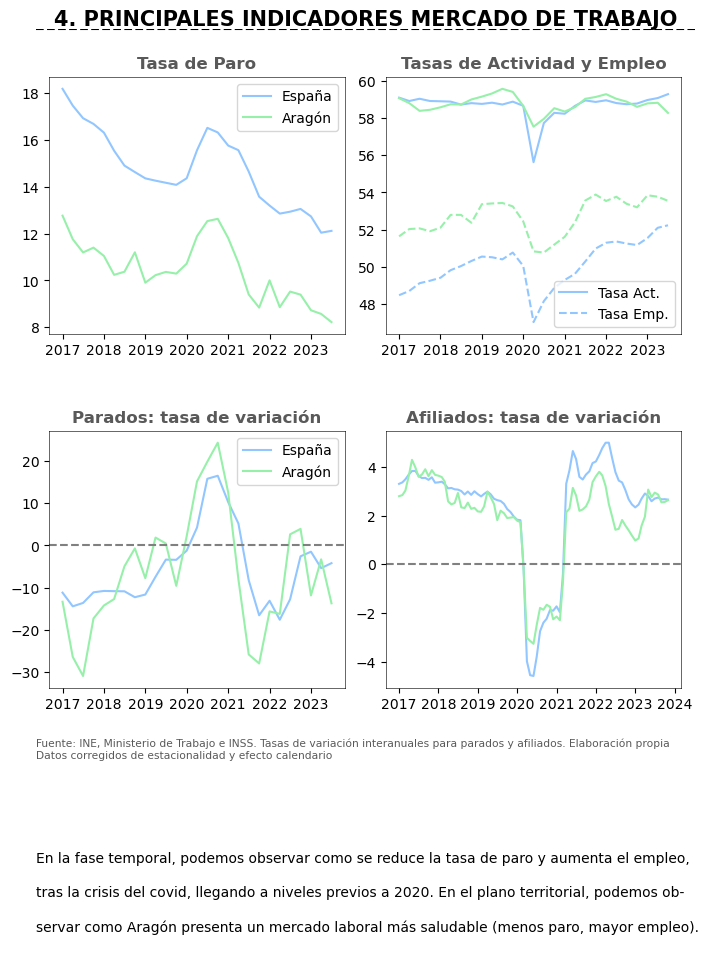

In [10]:
#Creamos primera página de mercado de trabajo:
gridsize=(100,100)
fig_size=(8.5,12.4)

fig,ax=plt.subplots(figsize=fig_size,dpi=100)

es= "#92C6FF"
ar="#97F0AA"

#Titulo:
ax1=plt.subplot2grid(gridsize,(0,0),colspan=100,rowspan=5)
text = "4. PRINCIPALES INDICADORES MERCADO DE TRABAJO"
ax1.set_title(text, weight="bold", size=15, va="center")
ax1.axhline(1,0, color='black', linestyle='--')
ax1.axis("Off")

#Tasa de paro:
ax2=plt.subplot2grid(gridsize,(5,2), colspan=45, rowspan=27)
ax2.plot(tp.esp_des.loc["2017":"2023"], color=es, label="España")
ax2.plot(tp.ara_des.loc["2017":"2023"], color=ar, label="Aragón")
ax2.set_title("Tasa de Paro", weight="bold", alpha=0.65)

ax2.xaxis.set_major_locator(mdates.YearLocator())
ax2.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax2.xaxis.get_major_locator()))

for axis in ['top', 'bottom', 'left', 'right']:
    ax2.spines[axis].set_linewidth(0.65)  
    ax2.spines[axis].set_alpha(0.65)
    
ax2.legend()

# Tasa de actividad y empleo:
ax3 = plt.subplot2grid(gridsize, (5, 53), colspan=45, rowspan=27)

# Configuración del estilo directamente en las líneas
ax3.plot(ta.esp_des.loc["2017":"2023"], color=es, label="Tasa Act.")
ax3.plot(te.esp_des.loc["2017":"2023"], color=es, label="Tasa Emp.",linestyle="dashed")
ax3.plot(ta.ara_des.loc["2017":"2023"], color=ar)
ax3.plot(te.ara_des.loc["2017":"2023"], color=ar, linestyle="dashed")

ax3.set_title("Tasas de Actividad y Empleo", weight="bold", alpha=0.65)
ax3.xaxis.set_major_locator(mdates.YearLocator())
ax3.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax3.xaxis.get_major_locator()))

# Ajustar la opacidad de los ejes:
for axis in ['top', 'bottom', 'left', 'right']:
    ax3.spines[axis].set_linewidth(0.65)
    ax3.spines[axis].set_alpha(0.65)
    
ax3.legend()

#Parados
ax4=plt.subplot2grid(gridsize,(42,2), colspan=45, rowspan=27)
ax4.plot(par.esp_tv.loc["2017":"2023"], color=es, label="España")
ax4.plot(par.ara_tv.loc["2017":"2023"], color=ar, label="Aragón")
ax4.set_title("Parados: tasa de variación", weight="bold", alpha=0.65)
ax4.axhline(0, color='grey', linestyle='--')
ax4.xaxis.set_major_locator(mdates.YearLocator())
ax4.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax4.xaxis.get_major_locator()))
for axis in ['top', 'bottom', 'left', 'right']:
    ax4.spines[axis].set_linewidth(0.65)  
    ax4.spines[axis].set_alpha(0.65)
    
ax4.legend()
    
#Afiliados
ax5=plt.subplot2grid(gridsize,(42,53), colspan=45, rowspan=27)
ax5.plot(afil.esp_tv.loc["2017":"2023"], color=es)
ax5.plot(afil.ara_tv.loc["2017":"2023"], color=ar)
ax5.set_title("Afiliados: tasa de variación", weight="bold",alpha=0.65)
ax5.axhline(0, color='grey', linestyle='--')
ax5.xaxis.set_major_locator(mdates.YearLocator())
ax5.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax5.xaxis.get_major_locator()))
for axis in ['top', 'bottom', 'left', 'right']:
    ax5.spines[axis].set_linewidth(0.65)  
    ax5.spines[axis].set_alpha(0.65)
    
#Comentario de los gráficos:
ax5=plt.subplot2grid(gridsize,(75,0), colspan=100, rowspan=5)
pie= "Fuente: INE, Ministerio de Trabajo e INSS. Tasas de variación interanuales para parados y afiliados. Elaboración propia"
pie2="Datos corregidos de estacionalidad y efecto calendario"
ax5.text(0,1,pie, size=7.7, alpha=0.65)
ax5.text(0,0.75,pie2, size=7.7, alpha=0.65)
ax5.axis(False)

#Comentario de los graficos
ax6=plt.subplot2grid(gridsize,(80,0), colspan=100, rowspan=18)
ax6.text(0,0.6, "En la fase temporal, podemos observar como se reduce la tasa de paro y aumenta el empleo,")
ax6.text(0,0.4, "tras la crisis del covid, llegando a niveles previos a 2020. En el plano territorial, podemos ob-")
ax6.text(0,0.2,"servar como Aragón presenta un mercado laboral más saludable (menos paro, mayor empleo).")
ax6.text(0,0,"")
ax6.axis(False)

plt.savefig("MdoLaboral1.pdf", format="pdf")
plt.show()

# Segunda Página 

C:\Users\Usuario\AppData\Local\Temp\ipykernel_18060\2218742602.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1=plt.subplot2grid(gridsize,(0,2), colspan=45, rowspan=30)


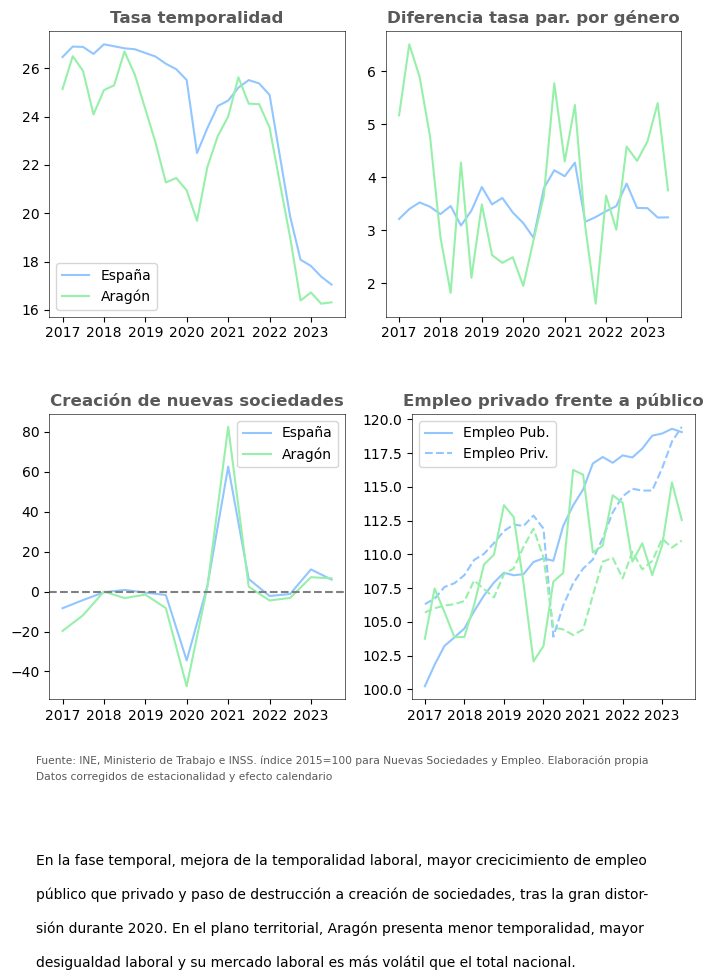

In [11]:
#Creamos primera página de mercado de trabajo:
gridsize=(100,100)
fig_size=(8.5,12.4)

fig,ax=plt.subplots(figsize=fig_size,dpi=100)

es= "#92C6FF"
ar="#97F0AA"

#Tasa de Temporalidad:
ax1=plt.subplot2grid(gridsize,(0,2), colspan=45, rowspan=30)

ax1.plot(tt.esp_des.loc["2017":"2023"], color=es, label="España")
ax1.plot(tt.ara_des.loc["2017":"2023"], color=ar, label="Aragón")
ax1.set_title("Tasa temporalidad", weight="bold", alpha=0.65)

ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax1.xaxis.get_major_locator()))

for axis in ['top', 'bottom', 'left', 'right']:
    ax1.spines[axis].set_linewidth(0.65)
    ax1.spines[axis].set_alpha(0.65)

ax1.legend()

# Diferencia tasa de paro por género:
ax2 = plt.subplot2grid(gridsize, (0, 53), colspan=45, rowspan=30)

ax2.plot(tp.esp_dif_des.loc["2017":"2023"], color=es)
ax2.plot(tp.ara_dif_des.loc["2017":"2023"], color=ar)
ax2.set_title("Diferencia tasa par. por género", weight="bold", alpha=0.65)
ax2.xaxis.set_major_locator(mdates.YearLocator())
ax2.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax2.xaxis.get_major_locator()))

for axis in ['top', 'bottom', 'left', 'right']:
    ax2.spines[axis].set_linewidth(0.65)
    ax2.spines[axis].set_alpha(0.65)

#Parados
ax3=plt.subplot2grid(gridsize,(40,2), colspan=45, rowspan=30)
ax3.plot(soc.esp_tv.loc["2017":"2023"], color=es, label="España")
ax3.plot(soc.ara_tv.loc["2017":"2023"], color=ar, label="Aragón")
ax3.set_title("Creación de nuevas sociedades", weight="bold", alpha=0.65)
ax3.axhline(0, color='grey', linestyle='--')
ax3.xaxis.set_major_locator(mdates.YearLocator())
ax3.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax3.xaxis.get_major_locator()))
for axis in ['top', 'bottom', 'left', 'right']:
    ax3.spines[axis].set_linewidth(0.65)  
    ax3.spines[axis].set_alpha(0.65)
    
ax3.legend()
    
#Empleo privado frente a público 
ax4=plt.subplot2grid(gridsize,(40,57), colspan=45, rowspan=30)
ax4.plot(emp.i_esp_pub.loc["2017":"2023"], color=es, label="Empleo Pub.")
ax4.plot(emp.i_esp_priv.loc["2017":"2023"], color=es, label="Empleo Priv.",linestyle="dashed")
ax4.plot(emp.i_ara_pub.loc["2017":"2023"], color=ar)
ax4.plot(emp.i_ara_priv.loc["2017":"2023"], color=ar, linestyle="dashed")


ax4.set_title("Empleo privado frente a público", weight="bold",alpha=0.65)
ax4.xaxis.set_major_locator(mdates.YearLocator())
ax4.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax4.xaxis.get_major_locator()))
for axis in ['top', 'bottom', 'left', 'right']:
    ax4.spines[axis].set_linewidth(0.65)  
    ax4.spines[axis].set_alpha(0.65)
    
ax4.legend()

#Comentario de los gráficos:
ax5=plt.subplot2grid(gridsize,(75,0), colspan=100, rowspan=5)
pie= "Fuente: INE, Ministerio de Trabajo e INSS. índice 2015=100 para Nuevas Sociedades y Empleo. Elaboración propia"
pie2="Datos corregidos de estacionalidad y efecto calendario"
ax5.text(0,0.66,pie, size=7.7, alpha=0.65)
ax5.text(0,0.33,pie2, size=7.7, alpha=0.65)
ax5.axis(False)

#Comentario de los graficos
ax6=plt.subplot2grid(gridsize,(80,0), colspan=100, rowspan=18)
ax6.text(0,0.6, "En la fase temporal, mejora de la temporalidad laboral, mayor crecicimiento de empleo")
ax6.text(0,0.4, "público que privado y paso de destrucción a creación de sociedades, tras la gran distor-")
ax6.text(0,0.2,"sión durante 2020. En el plano territorial, Aragón presenta menor temporalidad, mayor")
ax6.text(0,0,"desigualdad laboral y su mercado laboral es más volátil que el total nacional.")
ax6.axis(False)

plt.savefig("MdoLaboral2.pdf", format="pdf")
plt.show()

In [17]:
#Guardamos varaibles para previsiones:
tp.to_excel("C:/Users/usuario/OneDrive/Escritorio/3ro GANE/Previsiones/tp.xlsx", index=True)
ta.to_excel("C:/Users/usuario/OneDrive/Escritorio/3ro GANE/Previsiones/Exog tp/ta.xlsx", index=True)
te.to_excel("C:/Users/usuario/OneDrive/Escritorio/3ro GANE/Previsiones/Exog tp/te.xlsx", index=True)
par.to_excel("C:/Users/usuario/OneDrive/Escritorio/3ro GANE/Previsiones/Exog tp/par.xlsx", index=True)
index=tp.loc["2012-01":"2023-07"].index
afil=afil.loc[:"2023-09"].resample("Q").mean().set_axis(index)
afil.to_excel("C:/Users/usuario/OneDrive/Escritorio/3ro GANE/Previsiones/Exog tp/afil.xlsx", index=True)
tt.to_excel("C:/Users/usuario/OneDrive/Escritorio/3ro GANE/Previsiones/Exog tp/tt.xlsx", index=True)
emp.to_excel("C:/Users/usuario/OneDrive/Escritorio/3ro GANE/Previsiones/Exog tp/emp.xlsx", index=True)